In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob

# Path to your folder (change if needed)
path = r"E:\Data\Amazon Sales"

# Get all CSV files
files = glob.glob(path + "/*.csv")

# Read and merge
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

df.columns


C:\Users\Riz\AppData\Local\Temp\ipykernel_2460\728788175.py:15: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'Shiprocket', 'Unnamed: 1',
       'INCREFF', 'Recived Amount', 'Expance', 'Unnamed: 3', 'DATE', 'Months',
       'CUSTOMER', 'PCS', 'RATE', 'GROSS AMT', 'Sku', 'Style Id', 'Catalog',
       'Weight', 'TP', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP',
       'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP',
       'Paytm MRP', 'Snapdeal MRP', 'TP 1', 'TP 2', 'SKU Code', 'Design No.',
       'Stock', 'Color'],
      dtype='object')

In [340]:
cols_to_drop = [
    'promotion-ids', 'ASIN', 'ship-service-level',
    'Courier Status', 'Shiprocket', 'INCREFF',
    'SKU Code', 'Stock', 'Color',
    'Unnamed: 22', 'Unnamed: 1', 'Unnamed: 3',
    'Months'  ,'index'
    
]
cols_to_drop=[col for col in cols_to_drop if col in df.columns]
df=df.drop(columns=cols_to_drop)


In [341]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

C:\Users\Riz\AppData\Local\Temp\ipykernel_2460\795737818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
numeric_cols = ['Amount','Qty','RATE','PCS','GROSS AMT','Recived Amount','Expance',
                'TP','TP 1','TP 2','MRP Old','Final MRP Old','Ajio MRP','Amazon MRP',
                'Amazon FBA MRP','Flipkart MRP','Limeroad MRP','Myntra MRP',
                'Paytm MRP','Snapdeal MRP','Weight','PCS']


In [343]:
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce').fillna(0)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0)
df.dtypes

Order ID                    object
Date                datetime64[ns]
Status                      object
Fulfilment                  object
Sales Channel               object
Style                       object
SKU                         object
Category                    object
Size                        object
Qty                        float64
currency                    object
Amount                     float64
ship-city                   object
ship-state                  object
ship-postal-code           float64
ship-country                object
B2B                         object
fulfilled-by                object
Recived Amount              object
Expance                     object
DATE                        object
CUSTOMER                    object
PCS                         object
RATE                        object
GROSS AMT                   object
Sku                         object
Style Id                    object
Catalog                     object
Weight              

In [344]:
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

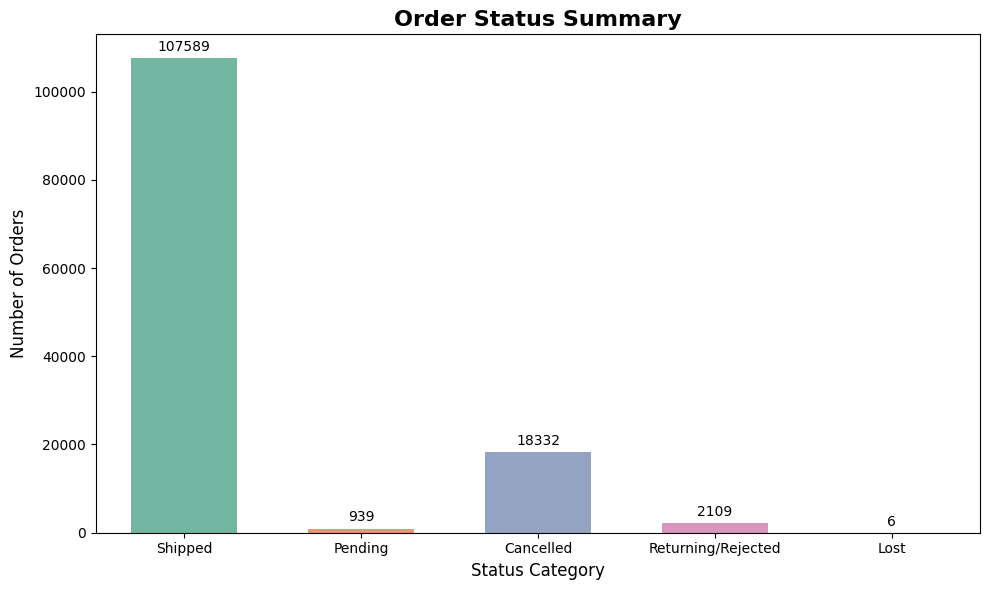

In [345]:
order_status = pd.DataFrame({
    'Category': ['Shipped', 'Pending', 'Cancelled', 'Returning/Rejected', 'Lost'],
    'Count': [107589, 939, 18332, 2109, 6]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Count',hue='Category', data=order_status, 
                 palette='Set2', width=0.6)


for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

ax.set_title("Order Status Summary", fontsize=16, fontweight='bold')
plt.xlabel("Status Category", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [346]:
latest_date=df['Date'].max()
six_months=latest_date-pd.DateOffset(months=6)
last6_df = df[df['Date'] >= six_months]
category_sales_6m = last6_df.groupby('Category')['Amount'].sum().reset_index()
category_sales_6m

,Category,Amount
0,Blouse,458408.18
1,Bottom,150667.98
2,Dupatta,915.00
3,Ethnic Dress,791217.66
4,Saree,123933.76
5,Set,39204124.03
6,Top,5347792.30
7,Western Dress,11216072.69
8,kurta,21299546.70


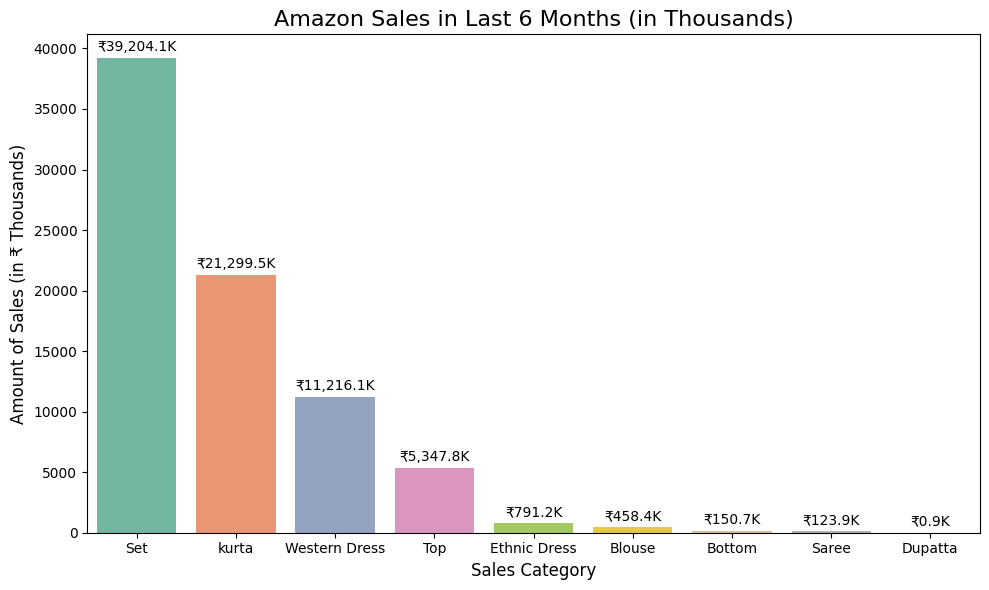

In [347]:
plt.figure(figsize=(10,6))

category_sales_6m['Amount_in_Thousands'] = category_sales_6m['Amount'] / 1000
sorted_cat=category_sales_6m.sort_values('Amount',ascending=False)
ax = sns.barplot(x='Category', y='Amount_in_Thousands', hue="Category", 
                 data=sorted_cat, palette="Set2")

for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'₹{x:,.1f}K' for x in container.datavalues], 
                 fontsize=10, padding=3)

ax.set_title("Amazon Sales in Last 6 Months (in Thousands)", fontsize=16)
plt.xlabel("Sales Category", fontsize=12)
plt.ylabel("Amount of Sales (in ₹ Thousands)", fontsize=12)
plt.tight_layout()
plt.show()

In [348]:
last6_df['Month'] = last6_df['Date'].dt.to_period('M')

monthly_category_sales = last6_df.groupby(['Month','Category'])['Amount'].sum().reset_index()
monthly_category_sales['Amount in Thousands']=monthly_category_sales['Amount']/1000
monthly_category_sales

,Month,Category,Amount,Amount in Thousands
0,2022-03,Blouse,280.00,0.28000
1,2022-03,Ethnic Dress,1099.00,1.09900
2,2022-03,Set,53884.00,53.88400
3,2022-03,Top,4511.00,4.51100
4,2022-03,Western Dress,7653.28,7.65328
5,2022-03,kurta,34256.57,34.25657
6,2022-04,Blouse,195583.21,195.58321
7,2022-04,Bottom,63308.45,63.30845
8,2022-04,Ethnic Dress,250666.65,250.66665
9,2022-04,Saree,55655.24,55.65524


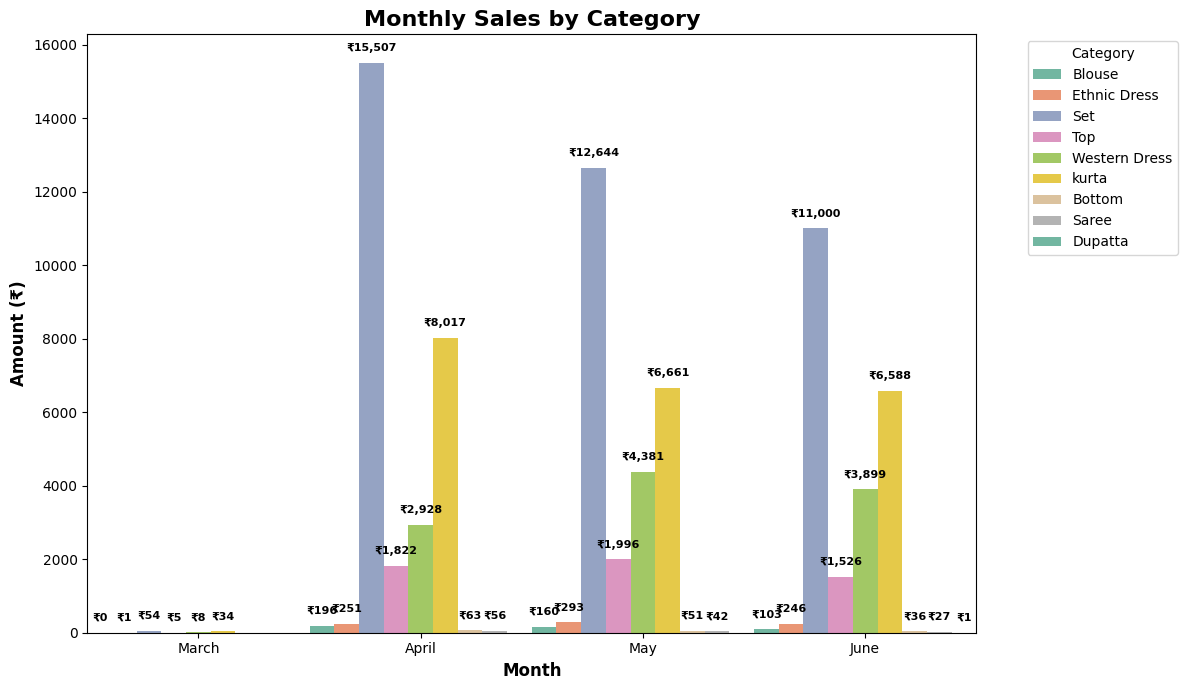

In [349]:
monthly_category_sales["Month"] = monthly_category_sales["Month"].dt.to_timestamp().dt.strftime("%B")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Month', y='Amount in Thousands', hue='Category', 
                 data=monthly_category_sales, palette='Set2', width=1)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=7,  fontweight='bold',
                 labels=[f'₹{x:,.0f}' if x >= 1000 else f'₹{x:.0f}' for x in container.datavalues])

# Customize
ax.set_title("Monthly Sales by Category", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.ylabel("Amount (₹)", fontsize=12, fontweight='bold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
top_skus = df.groupby("SKU")["Amount"].sum().sort_values(ascending=False).head(10)
top_skus

In [354]:
df['PCS'].isnull().sum()

np.int64(128975)